# Homework 09
This homework is based on the classification and regression lectures.

one hot coding is representing categorical vars as binary vectors
geature selection is choosing the iinput variables most relavent for a model to reduce overfitting
classifier is a model that assignes input data to categories of classes
precision is proportion of postives predicted that result in positive, TP/(TP + FP)
Recall is the proportion of positives identified correctly TP/ (TP + FN)
F1 Score is the harmonic mean of both precision and recall F1 = 2 x precision* recall / (precision + recall)
Parimonious model is a model that has good performance with few features 
ridge regression is a linear regression with L2 regularization
Lasso is linear regression that has L1 regularization 
Cross validation is a method to evaluate model performance thorugh splitting into multiple train and test and then averaging
Tree based is a model that recursively splits data

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula. 

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** |  |
| **Feature selection*** |  |
| **Classifier** |  |
| **Precision** |  |
| **Recall** |  |
| **F1 Score** |  |
| **Parsimonious model** |  |
| **Ridge regression** |  |
| **LASSO regression** |  |
| **Cross validation** |  |
| **Tree based methods** |  |

*Just give the general idea.

## Question 2 
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?

a) The shape a perfect classifier look like on an ROC curve would go up the yaxis to 0,1 and then straight across the top to (1,1) (sharp right angle at the left corner). 
b) A bad classifier would look like a diagonal line from (0,0) to (1,1). When F1 is close to 1, precision and recall are higher and when F1 is close to 0 precision or recall are low.

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** |  |  |
| **Dependent Variable Type** |  |  |
| **Purpose** (regression or classification) |  |  |
| **Range of output variable** ($y_i$ or $p_i$) |  |  |
| **Method*** |  |  |
| **Example of use** |  |  |  
  
*Meaning ordinary least squares or maximum likelihood estimation

linear has straight line relationship logistic is S shaped, dependent variable linear is continuous logistic is categorical. linear purpose is to predict numeric values, logistic is classification, the range of linear is - inf to inf, logistic is 0 to 1. Method of linear is OLS, logistic is MLE. Example of linear is predicting prices of housing, logistic is if something is considered true or false

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

It is important to first train then test a model because this allows it to be sure it can be generalized to other data. This is done by first splitting the data into a training set used to teach the model and testing set used to see how it performs. This allows us to look at how well the model performs in data used in other scenarios and the real world. 

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,-122.23,37.88,41,880,322,126,8.3252,452600
2,-122.22,37.86,21,7099,2401,1138,8.3014,358500
3,-122.24,37.85,52,1467,496,177,7.2574,352100
4,-122.25,37.85,52,1274,558,219,5.6431,341300
5,-122.25,37.85,52,1627,565,259,3.8462,342200
6,-122.25,37.85,52,919,413,193,4.0368,269700


   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
   population      households     median_income     median_house_value
 Min.   :    3   Min.   :   1.0   Min.   : 0.4999   Min.   : 14999    
 1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634   1st Qu.:119600    
 Median : 1166   Median : 409.0   Median : 3.5348   Median :179700    
 Mean   : 1425   Mean   : 499.5   Mean   : 3.8707   Mean   :206856    
 3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432   3rd Qu.:264725    
 Max.   :35682   Max.   :6082.0   Max.   :15.0001   Max.   :500001    

`geom_smooth()` using formula = 'y ~ x'


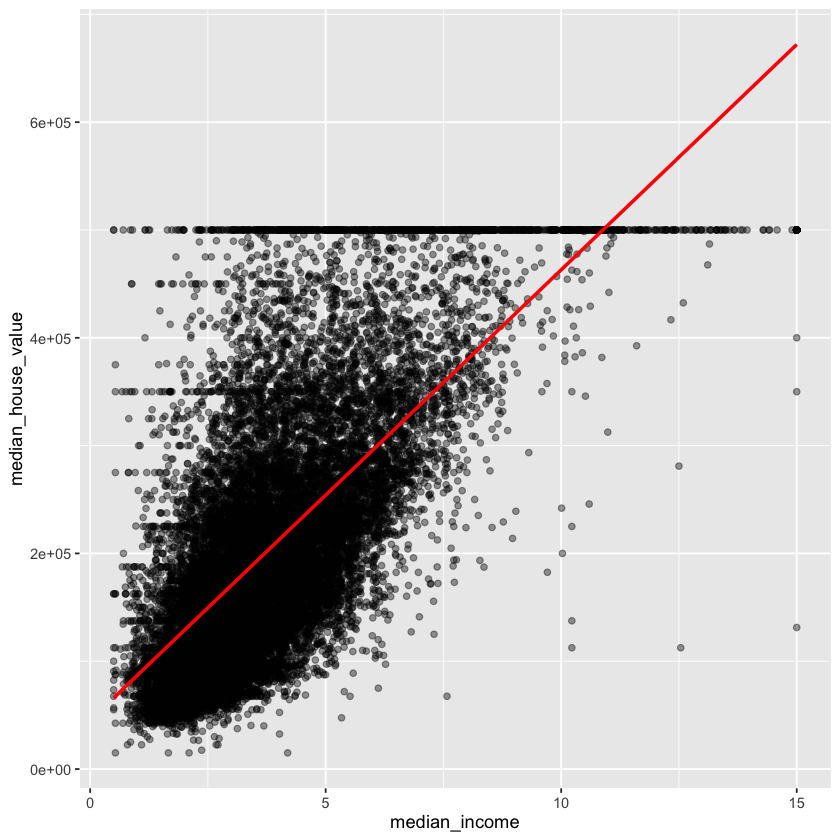

In [1]:
library(tidyverse)
housing <- read.csv("/Users/ericyao/Desktop/Workspace/BIOS512/data/housing.csv")

head(housing)
summary(housing)

ggplot(housing, aes(x = median_income, y = median_house_value)) +
  geom_point(alpha = 0.4) +
  geom_smooth(method = "lm", se = FALSE, color = "red")

linear regression is appropriate because the response variable is continuous and predictors are numeric. THe relationship is approx upward trend and linear

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [5]:
library(caret)
set.seed(123)

scaled_data <- as.data.frame(scale(housing))
train_index <- createDataPartition(scaled_data$median_house_value, p = 0.75, list = FALSE)
train <- scaled_data[train_index, ]
test  <- scaled_data[-train_index, ]

#### c) Fit the model.

In [10]:
model <- lm(median_house_value ~ ., data = train)

#### d) Make predictions on test data and show them in an actual vs. predicted plot.

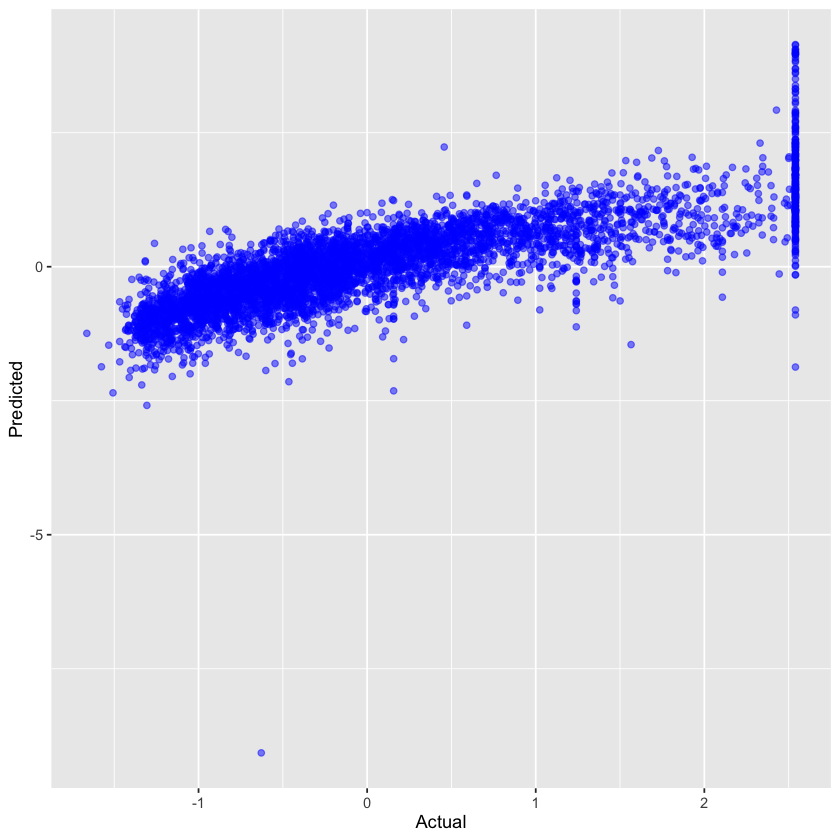

In [12]:
predictions <- predict(model, newdata = test)
results <- data.frame(
  Actual = test$median_house_value,
  Predicted = predictions
)

ggplot(results, aes(x = Actual, y = Predicted)) +
  geom_point(alpha = 0.5, color = "blue")

#### e) Make a residuals plot.

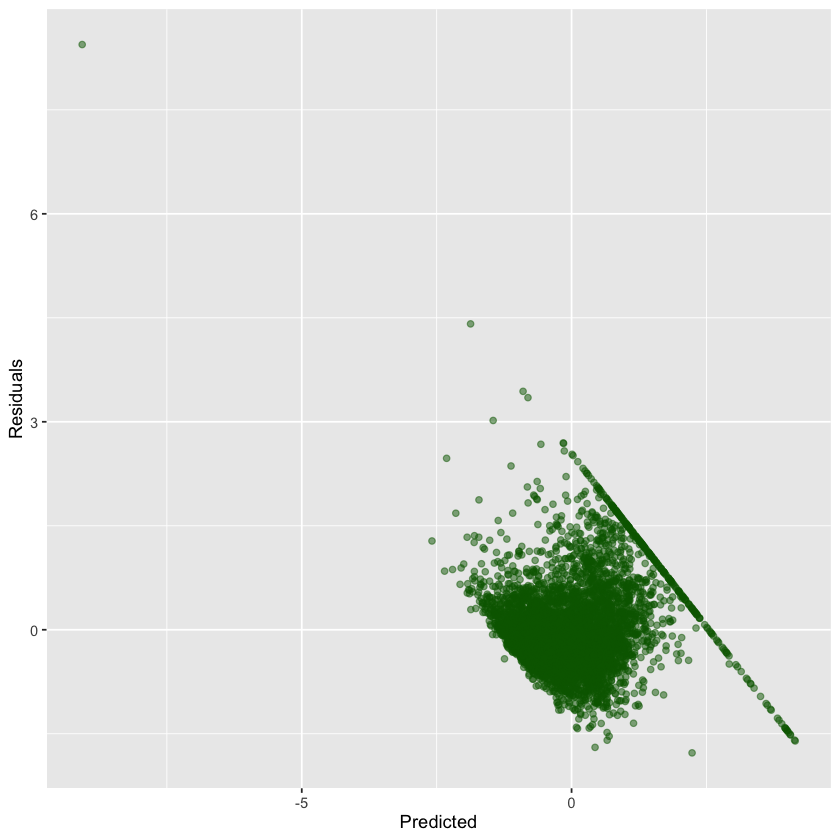

In [15]:
residuals <- results$Actual - results$Predicted
ggplot(data.frame(Predicted = results$Predicted, Residuals = residuals),
       aes(x = Predicted, y = Residuals)) +
  geom_point(alpha = 0.5, color = "darkgreen") 
  

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables. 
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

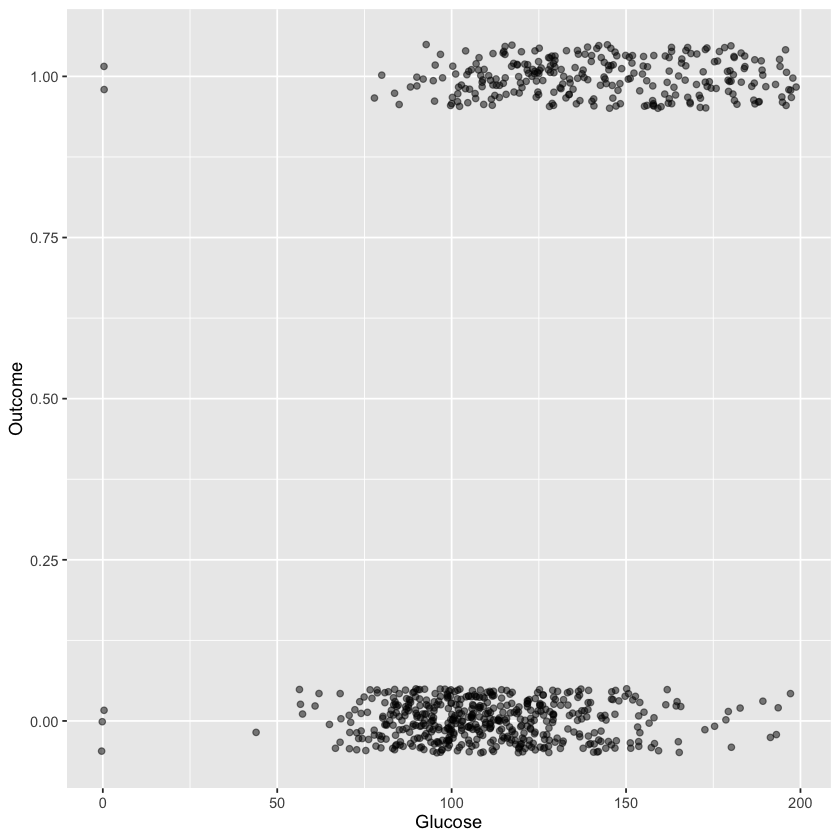

In [18]:
diabetes <- read.csv("/Users/ericyao/Desktop/Workspace/BIOS512/data/diabetes.csv")

str(diabetes)
summary(diabetes)

ggplot(diabetes, aes(x = Glucose, y = Outcome)) +
  geom_jitter(height = 0.05, alpha = 0.5)

appropriate because the outcome is binary

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [20]:
set.seed(123)
predictors <- diabetes %>% select(-Outcome)
scaled_predictors <- as.data.frame(scale(predictors))
diabetes_scaled <- cbind(scaled_predictors, Outcome = diabetes$Outcome)
sample_index <- sample(1:nrow(diabetes_scaled), 0.75 * nrow(diabetes_scaled))
train <- diabetes_scaled[sample_index, ]
test  <- diabetes_scaled[-sample_index, ]

#### c) Fit the model.

In [21]:
logit_model <- glm(Outcome ~ ., data = train, family = binomial)
summary(logit_model)


Call:
glm(formula = Outcome ~ ., family = binomial, data = train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -0.90319    0.11273  -8.012 1.13e-15 ***
Pregnancies               0.39262    0.12637   3.107  0.00189 ** 
Glucose                   1.17671    0.14189   8.293  < 2e-16 ***
BloodPressure            -0.26430    0.11480  -2.302  0.02131 *  
SkinThickness             0.07704    0.12533   0.615  0.53875    
Insulin                  -0.15585    0.11655  -1.337  0.18117    
BMI                       0.67134    0.13611   4.932 8.12e-07 ***
DiabetesPedigreeFunction  0.23841    0.10927   2.182  0.02912 *  
Age                       0.18663    0.12792   1.459  0.14456    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 538.57  on 567  degrees of freedom
AIC: 556.57

Number of F

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy. 

In [22]:

prob_pred <- predict(logit_model, newdata = test, type = "response")

pred_class <- ifelse(prob_pred >= 0.5, 1, 0)


conf_matrix <- table(Predicted = pred_class, Actual = test$Outcome)
conf_matrix


accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
accuracy

         Actual
Predicted   0   1
        0 112  31
        1  13  36

[1] 0.7708333

#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

In [23]:
library(glmnet)
set.seed(123)

x_train <- as.matrix(train %>% select(-Outcome))
y_train <- train$Outcome

x_test <- as.matrix(test %>% select(-Outcome))
y_test <- test$Outcome

lasso_model <- cv.glmnet(x_train, y_train, family = "binomial", alpha = 1)

best_lambda <- lasso_model$lambda.min
best_lambda

coef(lasso_model, s = "lambda.min")
lasso_prob <- predict(lasso_model, newx = x_test, s = "lambda.min", type = "response")
lasso_pred <- ifelse(lasso_prob >= 0.5, 1, 0)

lasso_conf <- table(Predicted = lasso_pred, Actual = y_test)
lasso_conf
lasso_acc <- sum(diag(lasso_conf)) / sum(lasso_conf)
lasso_acc

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-10



[1] 0.005550794

9 x 1 sparse Matrix of class "dgCMatrix"
                           lambda.min
(Intercept)              -0.876174389
Pregnancies               0.358492638
Glucose                   1.094444717
BloodPressure            -0.191905694
SkinThickness             0.008646508
Insulin                  -0.076249360
BMI                       0.616989900
DiabetesPedigreeFunction  0.199031066
Age                       0.155747780

         Actual
Predicted   0   1
        0 113  33
        1  12  34

[1] 0.765625

#### f) Make a plot of actual vs. predicted values for the LASSO model.

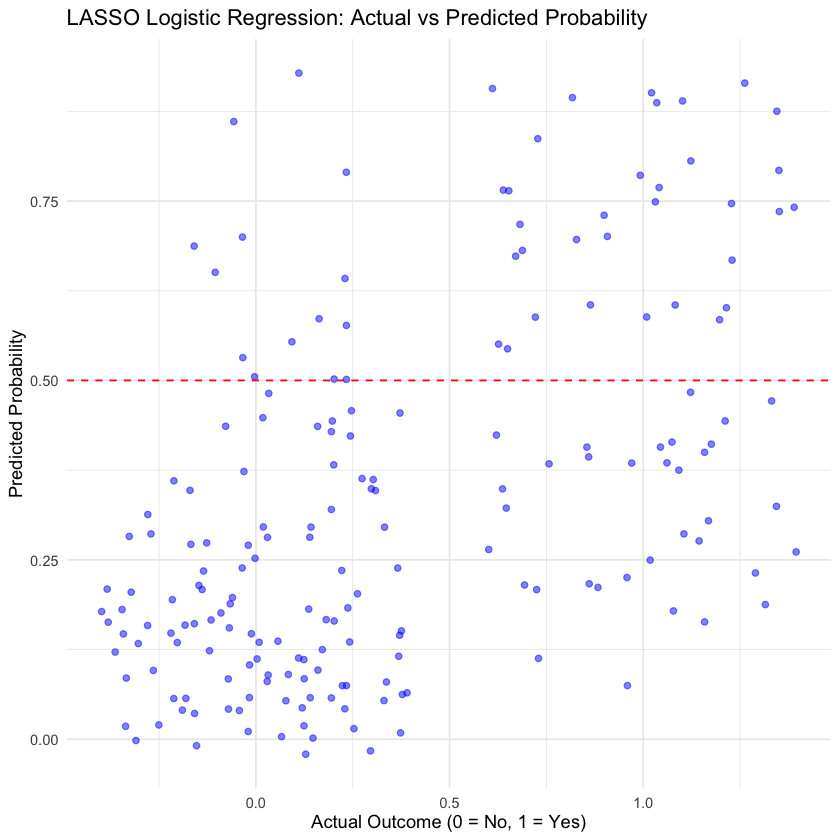

In [ ]:
results_lasso <- data.frame(
  Actual = y_test,
  Predicted = as.vector(lasso_prob)  
)

# Plot
library(ggplot2)

ggplot(results_lasso, aes(x = Actual, y = Predicted)) +
  geom_jitter(height = 0.05, alpha = 0.5, color = "blue") +
  geom_hline(yintercept = 0.5, linetype = "dashed", color = "red") +
  labs(
    title = "LASSO Logistic Regression: Actual vs Predicted Probability",
    x = "Actual Outcome (0 = No, 1 = Yes)",
    y = "Predicted Probability"
  ) +
  theme_minimal()
